In [2]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
from pathlib import Path
# Define path to the data directory
data_dir = Path('chest_xray')

# Path to train directory (Fancy pathlib...no more os.path!!)
train_dir = data_dir / 'train'

# Path to validation directory
val_dir = data_dir / 'val'

# Path to test directory
test_dir = data_dir / 'test'

# Train_data

In [4]:


# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = train_dir / 'NORMAL'
pneumonia_cases_dir = train_dir / 'PNEUMONIA'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')


# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in pneumonia_cases:
    train_data.append((img, 1))

# Get a pandas dataframe from the data we have in our list 
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Shuffle the data 
train_data = train_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
train_data.head()

,image,label
0,chest_xray\train\NORMAL\NORMAL2-IM-1288-0001.jpeg,0
1,chest_xray\train\PNEUMONIA\person332_bacteria_...,1
2,chest_xray\train\PNEUMONIA\person1024_virus_17...,1
3,chest_xray\train\NORMAL\IM-0601-0001.jpeg,0
4,chest_xray\train\PNEUMONIA\person956_virus_162...,1


In [5]:
train_data['matrix'] = train_data['image'].apply(lambda x: plt.imread(x))

In [6]:
IMG_SIZE = (224,224)

In [7]:
train_data['matrix'] = train_data['matrix'].apply(lambda x: cv2.resize(x,dsize=IMG_SIZE, interpolation=cv2.INTER_CUBIC))

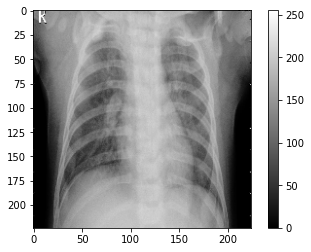

In [8]:
plt.figure()
plt.imshow(train_data.iloc[330,2], cmap=plt.get_cmap('gray'))
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_data.head()

,image,label,matrix
0,chest_xray\train\NORMAL\NORMAL2-IM-1288-0001.jpeg,0,"[[61, 63, 69, 75, 86, 85, 92, 89, 93, 96, 93, ..."
1,chest_xray\train\PNEUMONIA\person332_bacteria_...,1,"[[51, 53, 52, 52, 57, 55, 60, 61, 62, 62, 60, ..."
2,chest_xray\train\PNEUMONIA\person1024_virus_17...,1,"[[19, 20, 22, 27, 28, 30, 36, 40, 42, 46, 50, ..."
3,chest_xray\train\NORMAL\IM-0601-0001.jpeg,0,"[[12, 12, 13, 13, 15, 14, 15, 16, 15, 12, 16, ..."
4,chest_xray\train\PNEUMONIA\person956_virus_162...,1,"[[3, 3, 3, 2, 4, 13, 23, 25, 32, 43, 66, 64, 7..."


In [12]:
train_data[['label','matrix']].to_pickle("./train_data.pkl")

# Validation Data

In [13]:
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = val_dir / 'NORMAL'
pneumonia_cases_dir = val_dir / 'PNEUMONIA'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')

# An empty list. We will insert the data into this list in (img_path, label) format
valid_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    valid_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in pneumonia_cases:
    valid_data.append((img, 1))

# Get a pandas dataframe from the data we have in our list 
valid_data = pd.DataFrame(valid_data, columns=['image', 'label'],index=None)

# Shuffle the data 
valid_data = valid_data.sample(frac=1.).reset_index(drop=True)

valid_data['matrix'] = valid_data['image'].apply(lambda x: plt.imread(x))
valid_data['matrix'] = valid_data['matrix'].apply(lambda x: cv2.resize(x,dsize=IMG_SIZE, interpolation=cv2.INTER_CUBIC))
valid_data[['label','matrix']].to_pickle("./valid_data.pkl")

# Test Data

In [14]:
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = test_dir / 'NORMAL'
pneumonia_cases_dir = test_dir / 'PNEUMONIA'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')


# An empty list. We will insert the data into this list in (img_path, label) format
test_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    test_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in pneumonia_cases:
    test_data.append((img, 1))

# Get a pandas dataframe from the data we have in our list 
test_data = pd.DataFrame(test_data, columns=['image', 'label'],index=None)

# Shuffle the data 
test_data = test_data.sample(frac=1.).reset_index(drop=True)

test_data['matrix'] = test_data['image'].apply(lambda x: plt.imread(x))
test_data['matrix'] = test_data['matrix'].apply(lambda x: cv2.resize(x,dsize=IMG_SIZE, interpolation=cv2.INTER_CUBIC))
test_data[['label','matrix']].to_pickle("./test_data.pkl")